In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:\\Users\\Thai Hoang\\OneDrive\\Tài liệu\\Mall_Customers.csv")

# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Get a summary of the numerical columns
df.describe().astype(int)

Shape of the dataset: (200, 5)

Data types of the columns:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


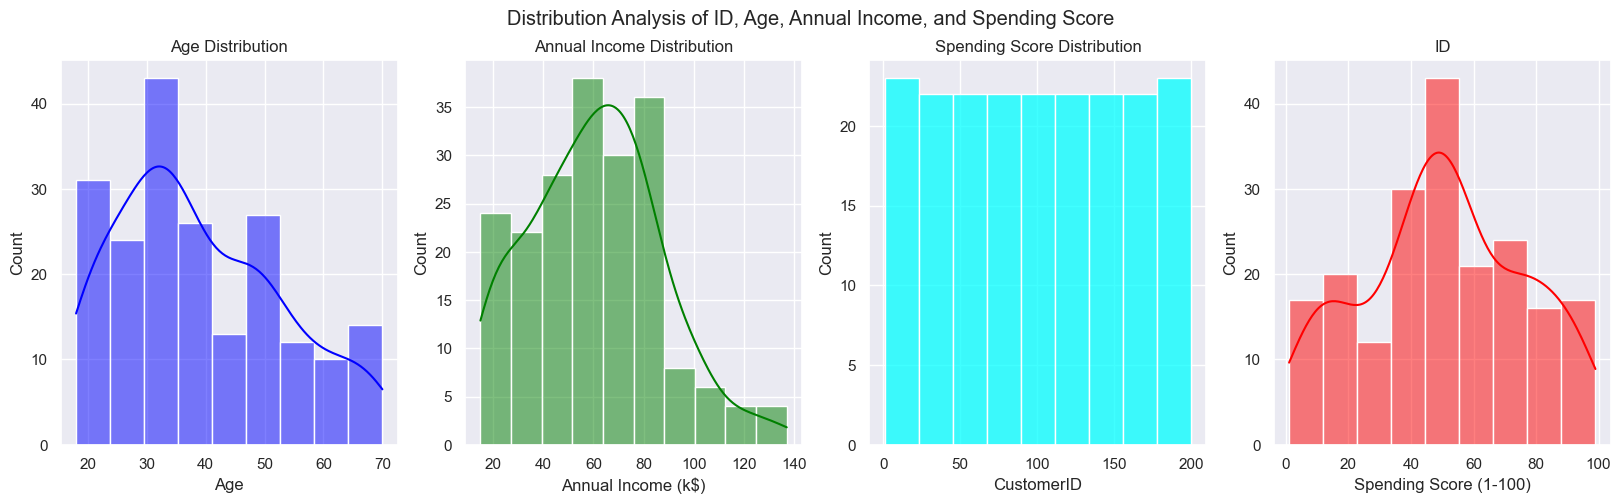

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
 

# Create a figure and axis objects
fig, graph = plt.subplots(1, 4, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=graph[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=graph[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=graph[3])
sns.histplot(data=df, x='CustomerID', kde=False, color='cyan', ax=graph[2])
# Set the titles of the plots
graph[0].set_title('Age Distribution')
graph[1].set_title('Annual Income Distribution')
graph[2].set_title('Spending Score Distribution')
graph[3].set_title('ID')
# Set the title for the entire plot
fig.suptitle('Distribution Analysis of ID, Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

In [3]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# Create the KMeans model with the optimal number of clusters (assumed to be 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.tail(20)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
180,181,Female,37,97,32,4
181,182,Female,32,97,86,1
182,183,Male,46,98,15,4
183,184,Female,29,98,88,1
184,185,Female,41,99,39,4
185,186,Male,30,99,97,1
186,187,Female,54,101,24,4
187,188,Male,28,101,68,1
188,189,Female,41,103,17,4
189,190,Female,36,103,85,1


In [4]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


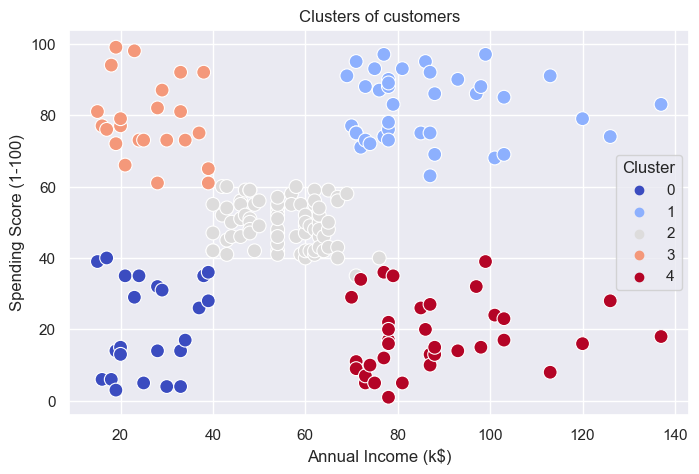

In [5]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='coolwarm', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()

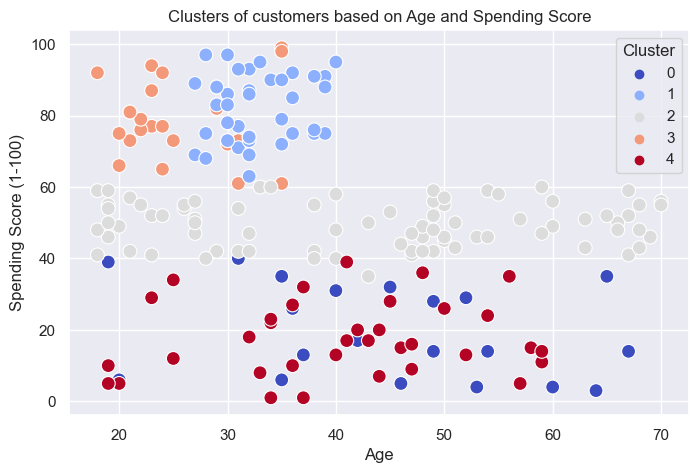

In [6]:
# Create a scatter plot of Age vs Spending Score 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
palette='coolwarm', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

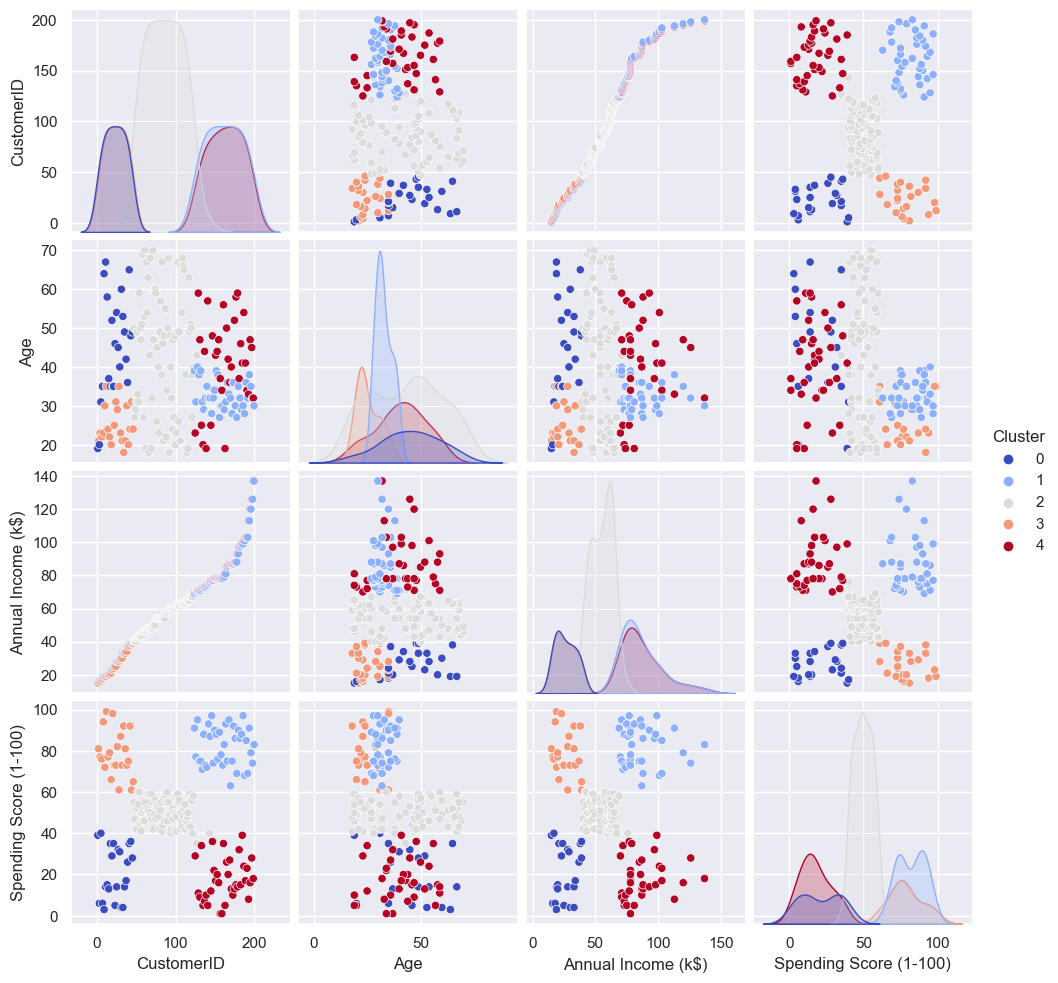

In [12]:
# Create a pairplot for relationships between the different features 
sns.pairplot(df, hue='Cluster', palette='coolwarm')

# Display the plot
plt.show()

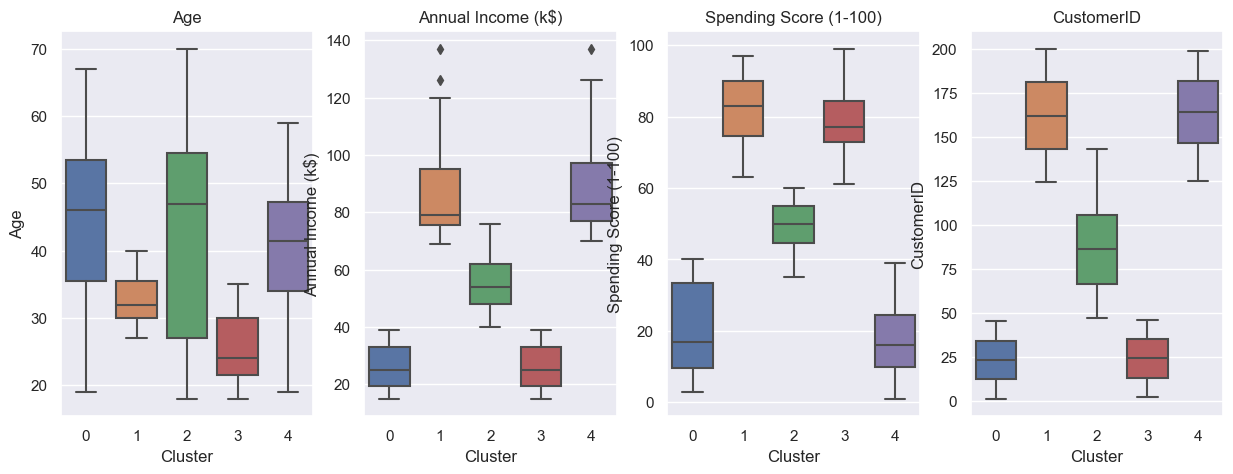

In [15]:
# Create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

#Boxplot for CustomerID, which is quite useless
sns.boxplot(data = df, x='Cluster', y='CustomerID', ax= axs[3])
axs[3].set_title('CustomerID')
# Display the plots
plt.show()